In [6]:
from ultralytics import SAM
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("Cut-and-Paste/objects/hammer/h1.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
model = SAM("sam2.1_b.pt")
results = model(image_rgb)



0: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 4719.0ms
Speed: 20.4ms preprocess, 4719.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


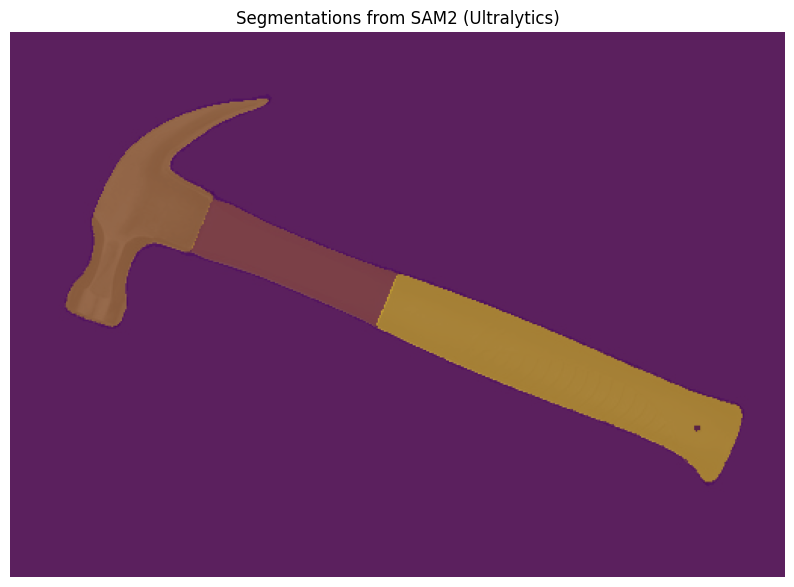

In [8]:
# Show masks from results
# results[0].masks.data is a list of binary masks (one per detected segment)
# results[0].masks.xyxyn contains polygon coordinates (normalized)
masks = results[0].masks.data.cpu().numpy()

# Visualize masks over the image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)

# Overlay each mask
for mask in masks:
    plt.imshow(mask, alpha=0.4)  # adjust alpha for transparency

plt.axis('off')
plt.title("Segmentations from SAM2 (Ultralytics)")
plt.show()

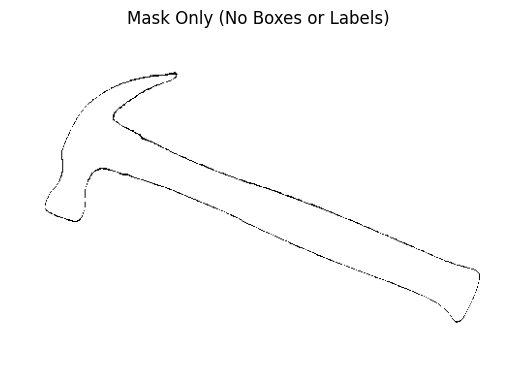

In [9]:
# Combine all masks into one binary mask
combined_mask = np.any(masks, axis=0).astype(np.uint8) * 255

# Save as a grayscale image (white = object, black = background)
cv2.imwrite("clean_mask.png", combined_mask)

# Optional: show the saved mask
plt.imshow(combined_mask, cmap="gray")
plt.title("Mask Only (No Boxes or Labels)")
plt.axis("off")
plt.show()